# 環境
environment
<br>
要有xgboost
<br>
會跟 keras 相衝

In [1]:
#來源：從鐵達尼練習中想到的，直接以收盤價做預測。但很容易 overfitting

In [2]:
import pandas as pd
foxconndf= pd.read_csv('daily.csv') #先以每日交易量做預測
mask=foxconndf['stock_id']==stock_id #要用def load stock [obj]進去
foxconndf=foxconndf[mask]

#把維度 normailize 避免數字差距過大
from sklearn import preprocessing

def normalize(df):
    newdf= df.copy()
    min_max_scaler = preprocessing.MinMaxScaler()
    
    newdf['Open'] = min_max_scaler.fit_transform(df.Open.values.reshape(-1,1))
    newdf['Low'] = min_max_scaler.fit_transform(df.Low.values.reshape(-1,1))
    newdf['High'] = min_max_scaler.fit_transform(df.High.values.reshape(-1,1))
    newdf['Volume'] = min_max_scaler.fit_transform(df.Volume.values.reshape(-1,1))
    newdf['Close'] = min_max_scaler.fit_transform(df.Close.values.reshape(-1,1))
    newdf=newdf[['Open','Low','High','Volume','Close']]
    return newdf

foxconndf_norm= normalize(foxconndf)
train_data = foxconndf_norm.drop('Close', axis = 1)
target = foxconndf_norm['Close']

In [3]:
'''
Predictive Modelling with several ML Algorithms and techniques
'''
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
X = train_data.copy()
Y = target.copy()

In [4]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process,model_selection
import xgboost
from xgboost import XGBClassifier
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.RandomForestClassifier(),


    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.RidgeClassifierCV(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),

        
    #xgboost
    XGBClassifier()    
    ]

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .2, train_size = .8, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_predict = Y
row_index = 0
X1 = X.copy()

In [ ]:
for alg in MLA:
    import numpy as np
    X = train_data.copy()
    Y = target.copy()
    Y = np.array(Y, dtype=int)
    MLA_name = alg.__class__.__name__
    print("Evaluating ",MLA_name)
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    cv_results = model_selection.cross_validate(alg, X, Y, cv  = cv_split)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3
    alg.fit(X, Y)
    MLA_predict[MLA_name] = alg.predict(X)
    row_index+=1
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)

In [8]:
MLA_compare

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.99946,0.00247261,0.00449662
5,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.99946,0.00247261,0.00297151
34,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.99946,0.00247261,0.00292323
31,KNeighborsClassifier,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.99946,0.00247261,0.00281422
30,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.99946,0.00247261,0.00262518
29,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.99946,0.00247261,0.00278404
28,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.99946,0.00247261,0.00502918
26,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.99946,0.00247261,0.147297
25,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.99946,0.00247261,0.020917
24,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.99946,0.00247261,0.00512745


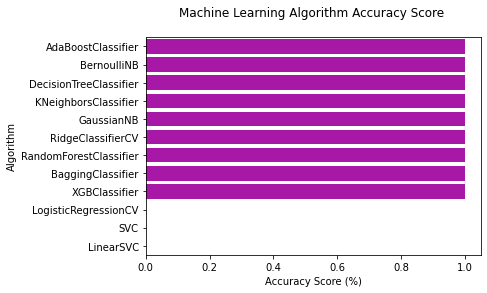

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.savefig("Comapre_{}.png".format(stock_id))

In [ ]:
import csv
with open('stock_list.csv',encoding="utf-8") as f:
    list_of_stock = csv.DictReader(f)
    for obj in list_of_stock:
        Merge(obj['stock_id'])